In [1]:
from matplotlib import pyplot as plt
from src.conf.config import CONFIG
from src.tune.tune_experiment import (
    TuneReportCallback, CheckpointCallback,
    train_tune_checkpoint, tune_pbt
)

/home/leos/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:124: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from 

In [2]:
config = CONFIG
analysis = tune_pbt(config, num_samples=2, num_epochs=4, gpus_per_trial=1, notebook=True)

Trial name,status,loc,edge_weight,lr,batch_size,avg_val_loss,avg_val_accuracy,training_iteration
DEFAULT_deee0_00000,TERMINATED,,1,0.001,6,0.117466,0.952766,4
DEFAULT_deee0_00001,TERMINATED,,2,0.0012,16,0.329478,0.927194,4


In [26]:
analysis.fetch_trial_dataframes()
analysis.get_best_logdir(metric="avg_val_accuracy")
analysis.get_best_trial(metric="avg_val_accuracy")
analysis.get_trial_checkpoints_paths(analysis.get_best_trial(metric="avg_val_accuracy"))
analysis.trials

[DEFAULT_deee0_00000, DEFAULT_deee0_00001]

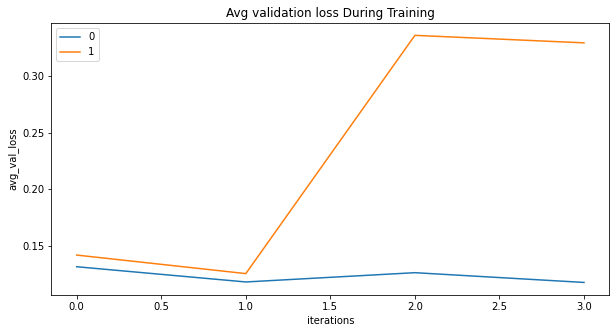

In [12]:
lossG = [df['avg_val_loss'].tolist() for df in list(analysis.trial_dataframes.values())]
plt.figure(figsize=(10,5))
plt.title("Avg validation loss During Training")
for i, lossg in enumerate(lossG):
    plt.plot(lossg, label=i)

plt.xlabel("iterations")
plt.ylabel("avg_val_loss")
plt.legend()
plt.show()